# Explore here

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()


,Pregnancies,Glucose,BMI,Age,Outcome
0,3.0,111.0,30.1,30.0,0
1,2.0,98.0,34.7,22.0,0
2,4.0,131.0,33.1,28.0,0
3,8.0,120.0,25.0,64.0,0
4,10.0,108.0,32.4,42.0,1


In [2]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]


In [4]:


model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

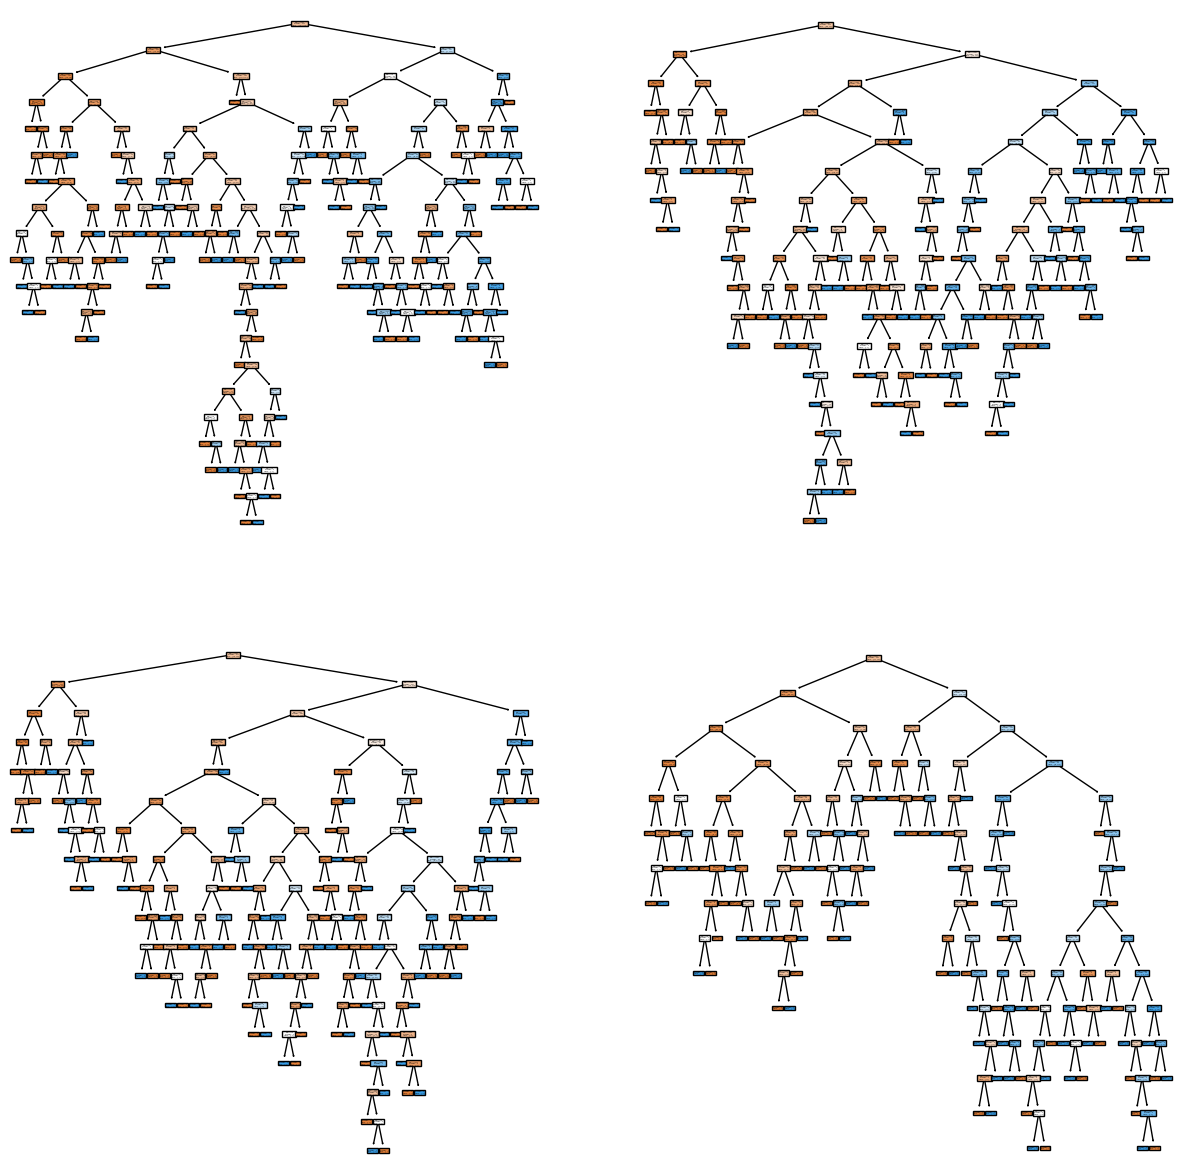

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), filled = True)

plt.show()

In [7]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.777027027027027

In [12]:
from pickle import dump

dump(model, open("../models/random_forest_classifier_default.sav", "wb"))

# Optimizacion 


In [14]:
from sklearn.model_selection import GridSearchCV

## Optimización

rf_grid = {"n_estimators": [200,250,300],
           "max_depth": [10,12],
           "min_samples_split": [12,14],
           "min_samples_leaf": [2,4],
           "max_features": [1,3,5,10,20,50]}

### RandomizedSearchCV

gd_model = GridSearchCV(RandomForestClassifier(),
                              param_grid=rf_grid,
                              scoring = "neg_root_mean_squared_error",
                              n_jobs= -1,
                              cv=5,
                              verbose=True)

## Entrenamiento
gd_model.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 12],
                         'max_features': [1, 3, 5, 10, 20, 50],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [12, 14],
                         'n_estimators': [200, 250, 300]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [15]:
gd_model.best_params_

{'max_depth': 12,
 'max_features': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 200}

In [18]:
gd_model_best = RandomForestClassifier(n_estimators = 200,
                                       min_samples_split = 14,
                                       min_samples_leaf = 2,
                                       max_features = 1,
                                       max_depth = 12)
gd_model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=1, min_samples_leaf=2,
                       min_samples_split=14, n_estimators=200)

In [19]:
y_pred_gd = gd_model_best.predict(X_test)


In [20]:
accuracy_score(y_test, y_pred_gd)

0.7972972972972973

In [21]:
dump(model, open("../models/random_forest_classifier_optimized.sav", "wb"))